<a href="https://colab.research.google.com/github/Vidacelinda/Data-of-Cardiovascular-Medicine/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

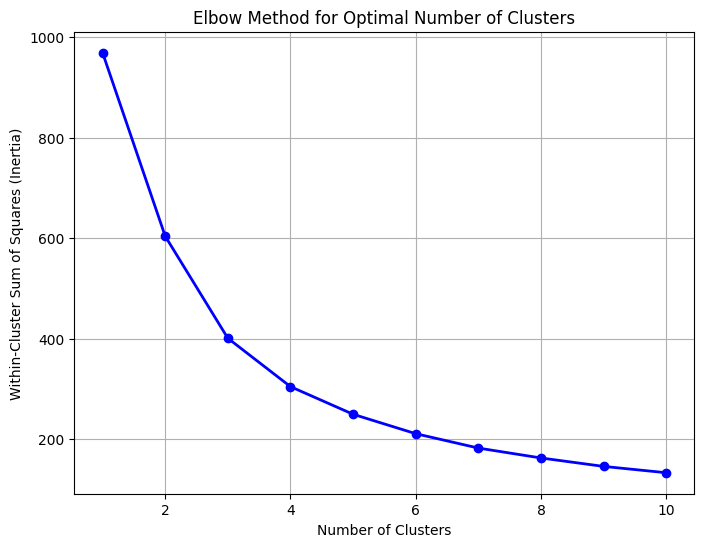

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset here into a DataFrame called 'data'
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
# Drop the 'DEATH_EVENT' column for clustering
X = data.drop('DEATH_EVENT', axis=1)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable called 'data'
features = data.drop(columns=['DEATH_EVENT'])  # Exclude the target variable 'DEATH_EVENT'

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components as 2 for visualization
pca_result = pca.fit_transform(scaled_features)

from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose any initial number of clusters
cluster_labels = kmeans.fit_predict(pca_result)

import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
possible_clusters = range(1, 11)  # You can adjust the range based on your dataset

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Visualize the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(possible_clusters, inertia, marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


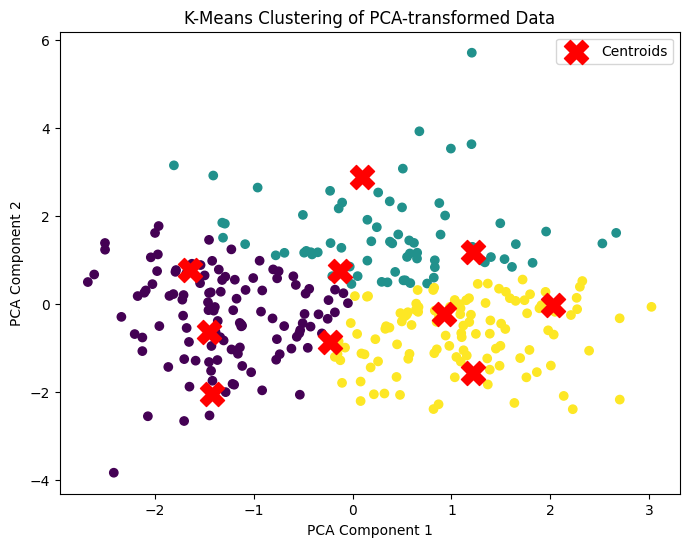

In [2]:
# Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of PCA-transformed Data')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


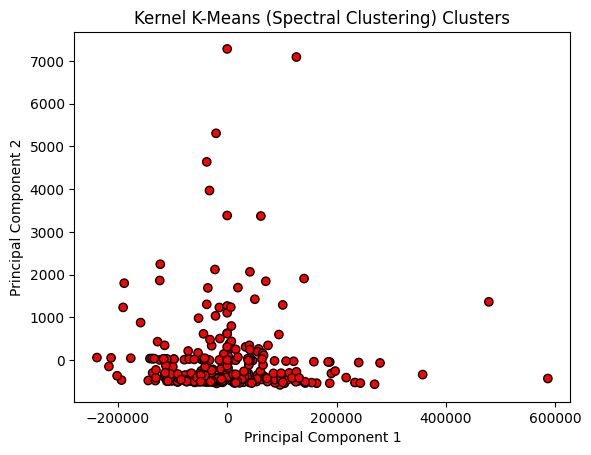

In [3]:
import pandas as pd

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
features = data.drop("DEATH_EVENT", axis=1)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='rbf')
kernel_clusters = spectral.fit_predict(features)

import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kernel_clusters, cmap='rainbow', edgecolors='k')
plt.title('Kernel K-Means (Spectral Clustering) Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

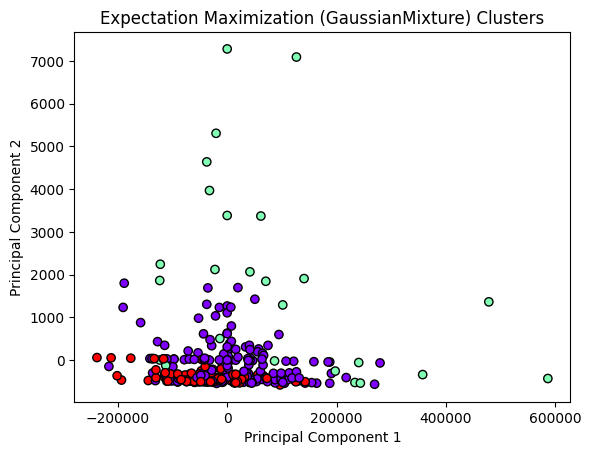

In [4]:
import pandas as pd

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
features = data.drop("DEATH_EVENT", axis=1)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)  # Adjust the number of components if necessary
gmm_clusters = gmm.fit_predict(features)

import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_clusters, cmap='rainbow', edgecolors='k')
plt.title('Expectation Maximization (GaussianMixture) Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
# Assuming your data is loaded in a variable 'data'
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Calculate mean squared error
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
print("Mean Squared Error (Linear Regression):", mse_linear_reg)

Mean Squared Error (Linear Regression): 0.17868807219099922


In [8]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set using Ridge regression
ridge_predictions = ridge_model.predict(X_test)

# Calculate mean squared error for Ridge regression
mse_ridge = mean_squared_error(y_test, ridge_predictions)
print("Mean Squared Error (Ridge Regression):", mse_ridge)


Mean Squared Error (Ridge Regression): 0.17844174236566349


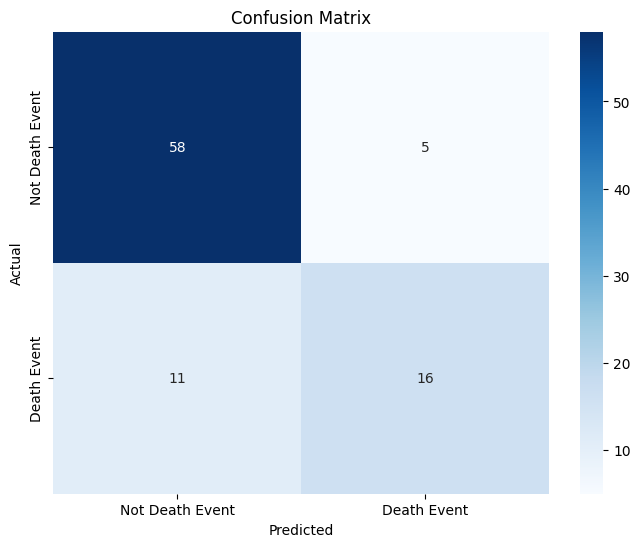

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        63
           1       0.76      0.59      0.67        27

    accuracy                           0.82        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and train classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Death Event', 'Death Event'],
            yticklabels=['Not Death Event', 'Death Event'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

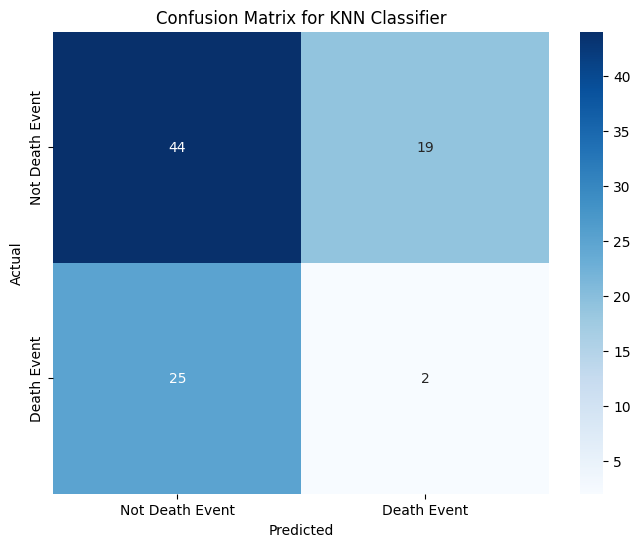

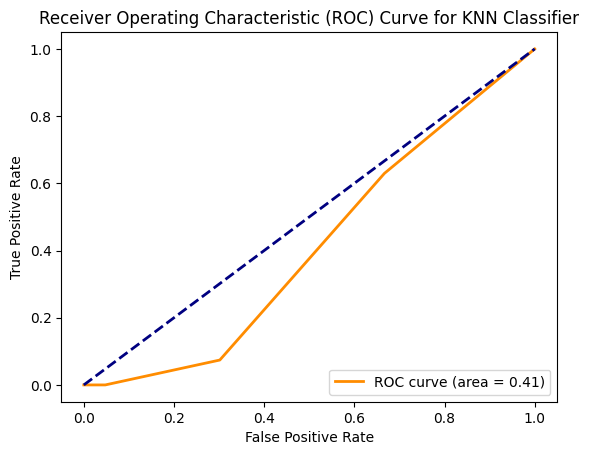

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with k neighbors (e.g., k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Death Event', 'Death Event'],
            yticklabels=['Not Death Event', 'Death Event'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_probs_knn = knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()




In [11]:
from sklearn.metrics import accuracy_score

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")

Naive Bayes Accuracy: 0.82
KNN Accuracy: 0.51
